In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [41]:
 def plot_dendrogram(model,**kwargs):
        # linkage matrix---> dendrogram
        # counts of  samples under each node
        counts= np.zeros(model.children_.shape[0])
        n_samples=len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count=0
        for child_idx in merge:
            if child_idx<n_samples:
                current_count+=1 # leaf node
            else:
                    current_count+= counts[child_idx-n_samples]
                    counts[i]=current_count
                    linkage_matrix=np.column_stack(
                    [model.children_,model.distances_,counts]
                ).astype(float)
                   
                    dendrogram(linkage_matrix, **kwargs)

In [42]:
iris= load_iris()

In [43]:
X= iris.data

In [44]:
model= AgglomerativeClustering(distance_threshold=0,n_clusters= None)


In [45]:
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

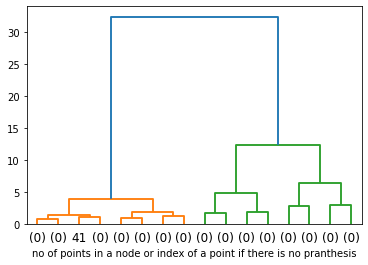

In [46]:
plot_dendrogram(model,truncate_mode ='level', p=3)
plt.xlabel('no of points in a node or index of a point if there is no pranthesis')
plt.show()